In [16]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sb
from csv import reader
import matplotlib.pyplot as plt
plt.figure(figsize=(15,12))

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

In [2]:
df=pd.read_csv("/content/drive/MyDrive/IrisEDA/data.csv")
df.head(100)
        #to extract first five columns

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor


In [3]:
df.tail(2)   #to extract last five columns

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
df.info()   #information of column data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
type(df.describe())

pandas.core.frame.DataFrame

In [7]:
#check types of species
df['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [8]:
df.shape

(150, 6)

In [9]:
#dropping the non-required columns
df1=df.drop(['Id'],axis=1)
df1.shape

(150, 5)

###Data Visualisation

From the pair plot, it will be clear that the relationship between pairs of features are similar or different for the species

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(15,12))

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

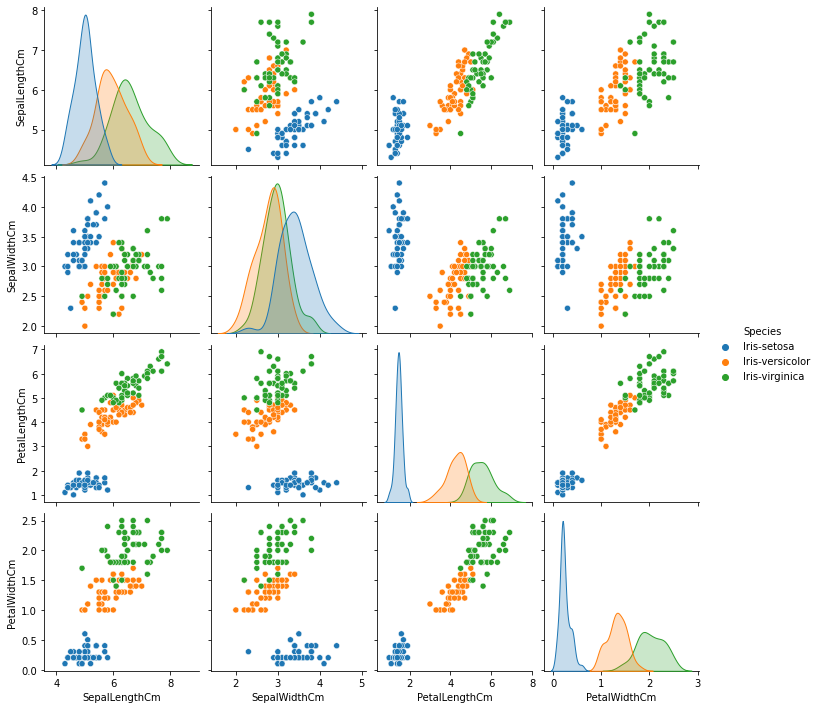

In [12]:
sb.pairplot(df1,hue='Species')   #(sl,sw)(pl,pw)
plt.show()

####Conclusion: The diagonal plot shows the probability distribution of a single variable, upper triangle and lower triangle shows scatter plot, i.e, relation between the features and upper triangle and lower triangle are mirror images of each other

##Studying the scatter plots

In [13]:
seto=df1.loc[df1["Species"]=="Iris-setosa"]
vir=df1.loc[df1["Species"]=="Iris-virginica"]
ver=df1.loc[df1["Species"]=="Iris-versicolor"]

In [14]:
seto.shape,vir.shape,ver.shape

((50, 5), (50, 5), (50, 5))

##1D Scatter Plot

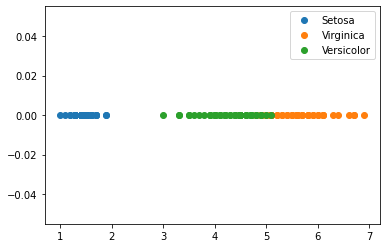

In [17]:
plt.plot(seto["PetalLengthCm"],np.zeros_like(seto["PetalLengthCm"]),'o',label="Setosa")
plt.plot(vir["PetalLengthCm"],np.zeros_like(vir["PetalLengthCm"]),'o',label="Virginica")
plt.plot(ver["PetalLengthCm"],np.zeros_like(ver["PetalLengthCm"]),'o',label="Versicolor")
plt.legend()

###from the 1-d scatter plot we can conclude that virginica and versicolor are more alike to each other

##2D Scatter Plot

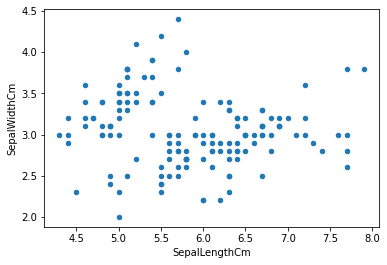

In [18]:
df1.plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm')
plt.show()             #this graph does not give any meaningful information. Therefore, we will use seaborn

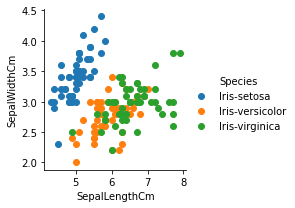

In [19]:
sb.FacetGrid(df1,hue='Species').map(plt.scatter,'SepalLengthCm','SepalWidthCm').add_legend()

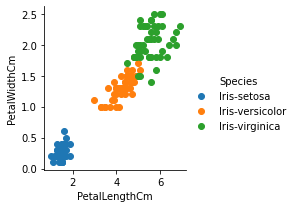

In [20]:
sb.FacetGrid(df1,hue='Species').map(plt.scatter,'PetalLengthCm','PetalWidthCm').add_legend()


###From the 2-d graph it can be concluded that sepal length and sepal width of versicolor and virginica are almost collapsing while they can be differentiated on the basis of petal length and petal width.

##HISTOGRAM and PDE (Probabiity Distribution Estimation)

###Histogram is an accurate graphical representation of the distribution of numerical data. It is an estimate of probablity distriution of a continuous variable

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

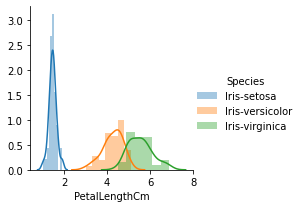

In [21]:
sb.FacetGrid(df1,hue='Species').map(sb.distplot,'PetalLengthCm').add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

[]

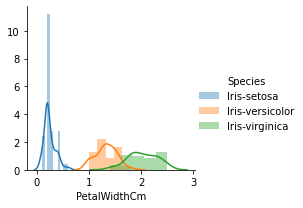

In [22]:
sb.FacetGrid(df1,hue='Species').map(sb.distplot,'PetalWidthCm').add_legend()
plt.plot()

###Conclusion: As we compare petal length and petal width, petal length of setosa are better separable than petal width. Also, there is overlap between versicolor and virginica

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

[]

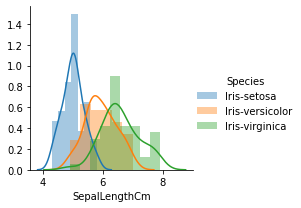

In [23]:
sb.FacetGrid(df1,hue='Species').map(sb.distplot,'SepalLengthCm').add_legend()
plt.plot()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

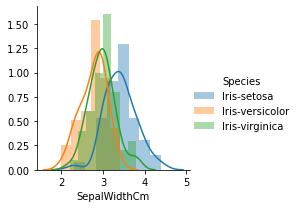

In [24]:
sb.FacetGrid(df1,hue='Species').map(sb.distplot,'SepalWidthCm').add_legend()

##We can't separate any class on the basis of sepal length and sepal width because they are overlapping

#CLASSIFICATION ALGORITHM

In [25]:
from sklearn import metrics                                       #used to find accuracy
from sklearn.linear_model import LogisticRegression               #used for classification
from sklearn.model_selection import train_test_split              #used for splitting the data

In [26]:
X=df1.drop('Species',axis=1)
y=df1["Species"]
X.shape,y.shape

((150, 4), (150,))

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=10)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((90, 4), (60, 4), (90,), (60,))

In [28]:
lr=LogisticRegression(multi_class='auto',solver='liblinear')
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
metrics.accuracy_score(y_pred,y_test)

0.8

In [29]:
lr.predict([[4.7,2.9,1.6,0.2]])

array(['Iris-setosa'], dtype=object)

In [30]:
print(lr.predict_proba([[5.9,1.9,1.6,0.2]]))

[[4.95482383e-01 5.04237834e-01 2.79782879e-04]]


In [31]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [32]:
lr.score(X_test,y_test)

0.8

In [33]:
lr.sparsify()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
lr.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [35]:
lr.coef_.toarray()

array([[ 0.3367472 ,  1.35456416, -2.01459149, -0.94686153],
       [ 0.68766128, -1.71873951,  0.06671239, -0.62524156],
       [-1.43831595, -1.13462969,  2.10942653,  1.86256222]])

In [36]:
lr.intercept_

array([ 0.22212861,  0.68618642, -0.8110032 ])

In [37]:
lr.n_iter_

array([7], dtype=int32)